<div style="text-align: center;">
  <span style="color:#809bd8; font-size: 24px; font-weight: bold;">Institución Universitaria Digital de Antioquia</span>
  <br>
  <img src="https://imgur.com/KUMa2uy.png" alt="DataFrame frutas" style="max-width: 20%; height: auto;">
</div>

---
**<span style="color:#809bd8">Evidencia de Aprendizaje:</span>** **EA1. Regresión lineal en Sklearn**

**<span style="color:#809bd8">Asignatura:</span>** **Machine Learning**

**<span style="color:#809bd8">Estudiante:</span>** **Jean Carlos Páez Ramírez**

**<span style="color:#809bd8">Grupo:</span>** **PREICA2501B010107**

**<span style="color:#809bd8">Docente:</span>** **Sharon Karin Camacho Guzman (Ingeniera Administradora Especialista en ingeniería Financiera de la Universidad Nacional de Colombia)**

**<span style="color:#809bd8">Fecha:</span>** **24 de febrero de 2025**

## **1. Importación de librerias necesarias.**

In [23]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **2. Cargue e impresión de los dataset.**

In [24]:
# Cargar los datasets
fuel_data = pd.read_csv("../data/FuelConsumptionCo2.csv")
ecommerce_data = pd.read_csv("../data/Ecommerce Customers-1.csv")

# Mostrar las primeras filas de cada dataset
print("Dataset FuelConsumptionCo2:")
display(fuel_data.head())

print("Dataset Ecommerce Customers:")
display(ecommerce_data.head())

Dataset FuelConsumptionCo2:


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Dataset Ecommerce Customers:


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## **3. Análisis Exploratorio de Datos (AED).**

En esta sección, exploraré los datos para entender su estructura y características.

In [25]:
# Información general de los datasets
print("Información del dataset FuelConsumptionCo2:")
fuel_data.info()

print("\nInformación del dataset Ecommerce Customers:")
ecommerce_data.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset FuelConsumptionCo2:")
display(fuel_data.describe())

print("\nEstadísticas descriptivas del dataset Ecommerce Customers:")
display(ecommerce_data.describe())

# Verificar valores nulos
print("\nValores nulos en FuelConsumptionCo2:")
print(fuel_data.isnull().sum())

print("\nValores nulos en Ecommerce Customers:")
print(ecommerce_data.isnull().sum())

Información del dataset FuelConsumptionCo2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int6

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



Estadísticas descriptivas del dataset Ecommerce Customers:


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462



Valores nulos en FuelConsumptionCo2:
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Valores nulos en Ecommerce Customers:
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


## **4. Visualización de correlaciones.**

Usaré seaborn para visualizar las correlaciones entre las variables y determinar cuáles tienen mayor impacto en la variable dependiente.

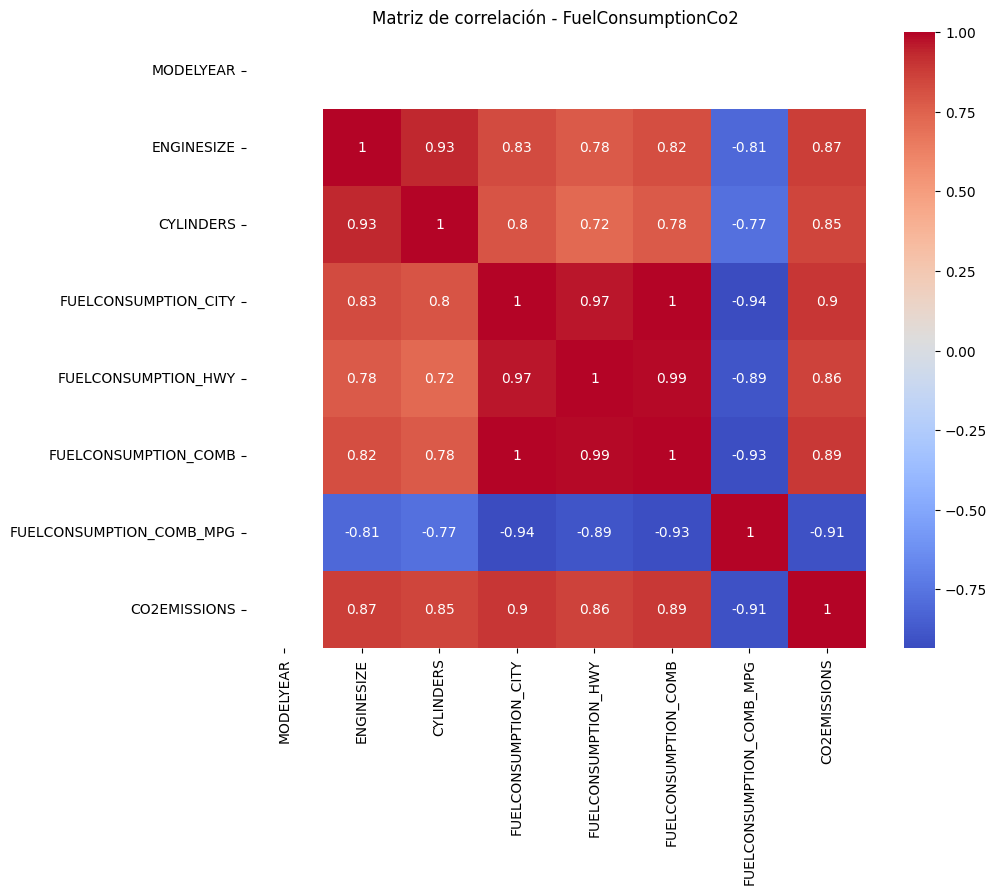

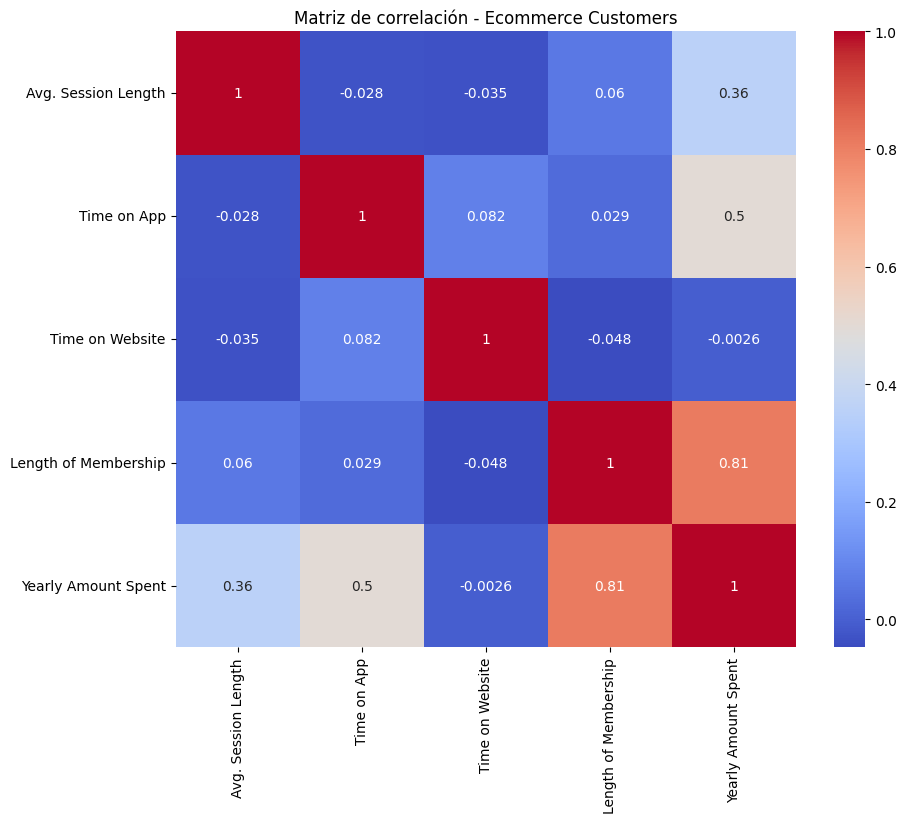

In [26]:
# Selecciona solo las columnas numéricas del DataFrame FuelConsumptionCo2
fuel_data_numeric = fuel_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(fuel_data_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación - FuelConsumptionCo2")
plt.show()

# Selecciona solo las columnas numéricas del DataFrame Ecommerce Customers
ecommerce_data_numeric = ecommerce_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(ecommerce_data_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación - Ecommerce Customers")
plt.show()

#### *Decisión al analizar la visualización de las correlaciones.*

### **4.1 Dataset: FuelConsumptionCo2**

#### Observaciones de la matriz de correlación:

*   La variable dependiente más lógica es **CO2EMISSIONS**, ya que parece ser el objetivo del análisis (predecir emisiones de CO₂).
    
*   Las variables con mayor correlación positiva con **CO2EMISSIONS** son:
    
    *   **ENGINESIZE** (correlación = 0.87)
        
    *   **CYLINDERS** (correlación = 0.85)
        
    *   **FUELCONSUMPTION\_CITY** (correlación = 0.90)
        
    *   **FUELCONSUMPTION\_HWY** (correlación = 0.86)
        
    *   **FUELCONSUMPTION\_COMB** (correlación = 0.89)
        

#### Selección de variables:

*   **Variable dependiente (yyy):** CO2EMISSIONS
    
*   **Variables independientes (XXX):**
    
    *   ENGINESIZE
        
    *   CYLINDERS
        
    *   FUELCONSUMPTION\_COMB (en lugar de las variables de consumo por ciudad y autopista, ya que es un promedio más representativo)

Así quedó:

*   **FuelConsumptionCo2:**
    
    *   X=X =X= \["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION\_COMB"\]
        
    *   y=y =y= CO2EMISSIONS

### **4.2 Dataset: Ecommerce Customers**

#### Observaciones de la matriz de correlación:

*   La variable dependiente más lógica es **Yearly Amount Spent**, ya que parece ser el objetivo del análisis (predecir el gasto anual de los clientes).
    
*   Las variables con mayor correlación positiva con **Yearly Amount Spent** son:
    
    *   **Length of Membership** (correlación = 0.81)
        
    *   **Time on App** (correlación = 0.50)
        
    *   **Avg. Session Length** (correlación = 0.36)
        

#### Selección de variables:

*   **Variable dependiente (yyy):** Yearly Amount Spent
    
*   **Variables independientes (XXX):**
    
    *   Length of Membership
        
    *   Time on App
        
    *   Avg. Session Length

Así quedó:

*   **Ecommerce Customers:**
    
    *   X=X =X= \["Length of Membership", "Time on App", "Avg. Session Length"\]
        
    *   y=y =y= Yearly Amount Spent

## **5. Preparación de los datos para el entrenamiento.**

### *5.1 Entrenamiento para el Dataset: FuelConsumptionCo2*

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Selección de variables
X_fuel = fuel_data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
y_fuel = fuel_data["CO2EMISSIONS"]

# División de los datos en entrenamiento y prueba
X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model_fuel = LinearRegression()
model_fuel.fit(X_train_fuel, y_train_fuel)

# Predicciones
y_pred_fuel = model_fuel.predict(X_test_fuel)

# Evaluación del modelo
    # Para FuelConsumptionCo2
mae_fuel = mean_absolute_error(y_test_fuel, y_pred_fuel)
mse_fuel = mean_squared_error(y_test_fuel, y_pred_fuel)
rmse_fuel = mse_fuel**0.5
r2_fuel = r2_score(y_test_fuel, y_pred_fuel)

print("\nMétricas para FuelConsumptionCo2:")
print(f"Mean Absolute Error (MAE): {mae_fuel:.2f}")
print(f"Mean Squared Error (MSE): {mse_fuel:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_fuel:.2f}")
print(f"R-squared (R2): {r2_fuel:.2f}")


Métricas para FuelConsumptionCo2:
Mean Absolute Error (MAE): 16.72
Mean Squared Error (MSE): 512.86
Root Mean Squared Error (RMSE): 22.65
R-squared (R2): 0.88


### *5.2 Entrenamiento para el Dataset: FuelConsumptionCo2*

In [28]:
# Selección de variables
X_ecommerce = ecommerce_data[["Length of Membership", "Time on App", "Avg. Session Length"]]
y_ecommerce = ecommerce_data["Yearly Amount Spent"]

# División de los datos en entrenamiento y prueba
X_train_ecommerce, X_test_ecommerce, y_train_ecommerce, y_test_ecommerce = train_test_split(X_ecommerce, y_ecommerce, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model_ecommerce = LinearRegression()
model_ecommerce.fit(X_train_ecommerce, y_train_ecommerce)

# Predicciones
y_pred_ecommerce = model_ecommerce.predict(X_test_ecommerce)

# Evaluación del modelo
    # Para Ecommerce Customers
mae_ecommerce = mean_absolute_error(y_test_ecommerce, y_pred_ecommerce)
mse_ecommerce = mean_squared_error(y_test_ecommerce, y_pred_ecommerce)
rmse_ecommerce = mse_ecommerce**0.5
r2_ecommerce = r2_score(y_test_ecommerce, y_pred_ecommerce)

print("\nMétricas para Ecommerce Customers:")
print(f"Mean Absolute Error (MAE): {mae_ecommerce:.2f}")
print(f"Mean Squared Error (MSE): {mse_ecommerce:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ecommerce:.2f}")
print(f"R-squared (R2): {r2_ecommerce:.2f}")


Métricas para Ecommerce Customers:
Mean Absolute Error (MAE): 8.58
Mean Squared Error (MSE): 110.32
Root Mean Squared Error (RMSE): 10.50
R-squared (R2): 0.98


### *Mas evaluación: Coeficientes de cada variable de cada dataset.*

In [29]:
# Coeficientes para FuelConsumptionCo2
print("Coeficientes - FuelConsumptionCo2:")
for feature, coef in zip(X_fuel.columns, model_fuel.coef_):
    print(f"{feature}: {coef:.2f}")

# Coeficientes para Ecommerce Customers
print("\nCoeficientes - Ecommerce Customers:")
for feature, coef in zip(X_ecommerce.columns, model_ecommerce.coef_):
    print(f"{feature}: {coef:.2f}")

Coeficientes - FuelConsumptionCo2:
ENGINESIZE: 11.21
CYLINDERS: 7.16
FUELCONSUMPTION_COMB: 9.52

Coeficientes - Ecommerce Customers:
Length of Membership: 61.88
Time on App: 38.81
Avg. Session Length: 25.60


## **6. Análisis de residuos.**

### *6.1 Análisis de residuos para FuelConsumptionCo2*

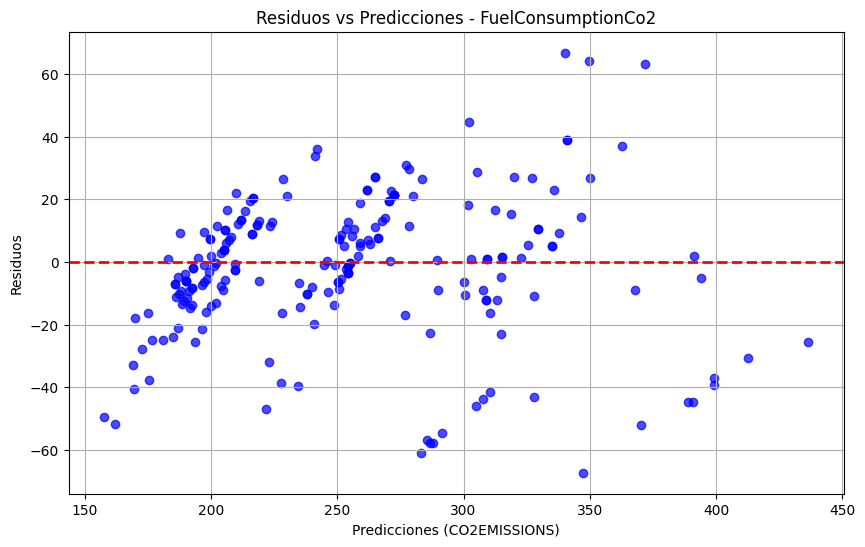

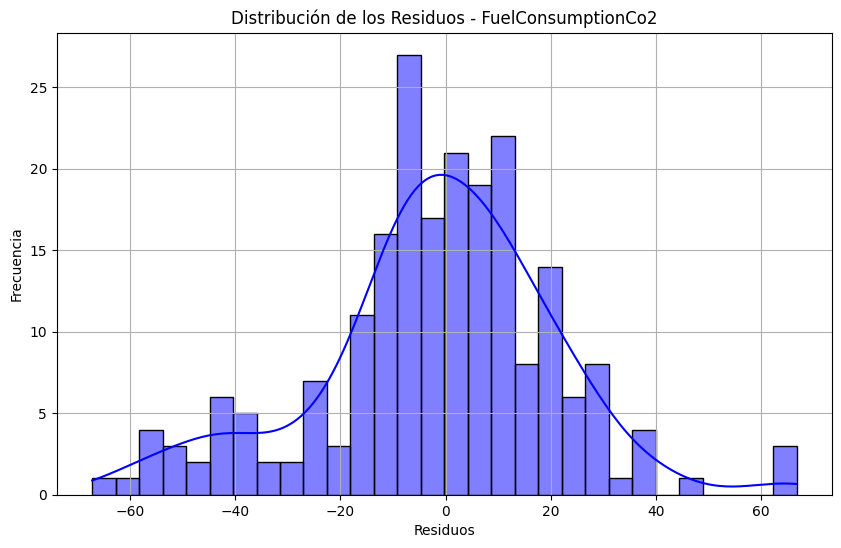

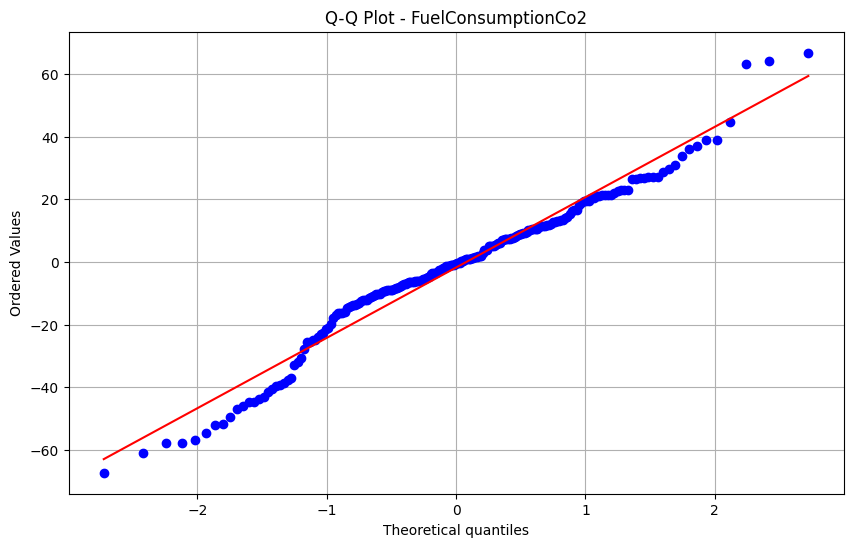

In [30]:
# Calcular los residuos
residuals_fuel = y_test_fuel - y_pred_fuel
residuals_ecommerce = y_test_ecommerce - y_pred_ecommerce

# Gráfico de residuos vs predicciones para FuelConsumptionCo2
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_fuel, residuals_fuel, alpha=0.7, color='blue')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicciones (CO2EMISSIONS)")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones - FuelConsumptionCo2")
plt.grid(True)
plt.show()

# Histograma de los residuos para FuelConsumptionCo2
plt.figure(figsize=(10, 6))
sns.histplot(residuals_fuel, kde=True, bins=30, color='blue')
plt.title("Distribución de los Residuos - FuelConsumptionCo2")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Q-Q plot para FuelConsumptionCo2
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals_fuel, dist="norm", plot=plt)
plt.title("Q-Q Plot - FuelConsumptionCo2")
plt.grid(True)
plt.show()

### *6.2 Análisis de residuos para Ecommerce Customers*

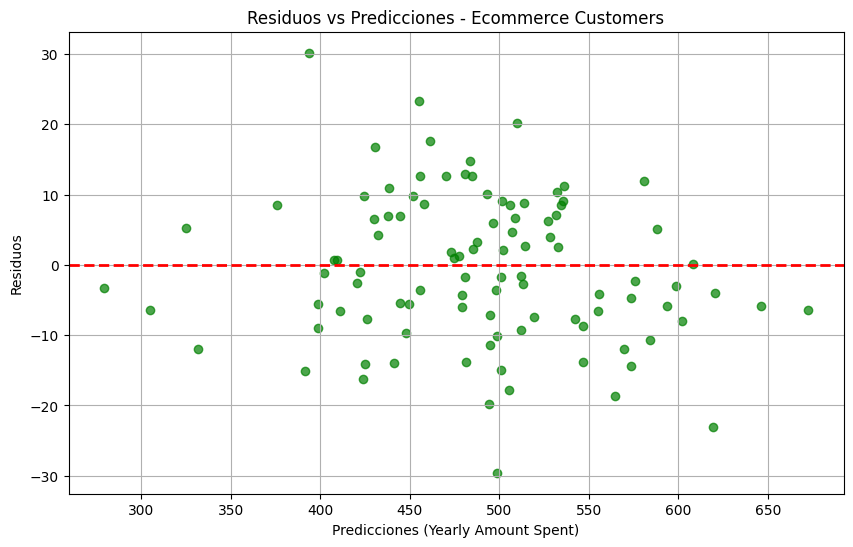

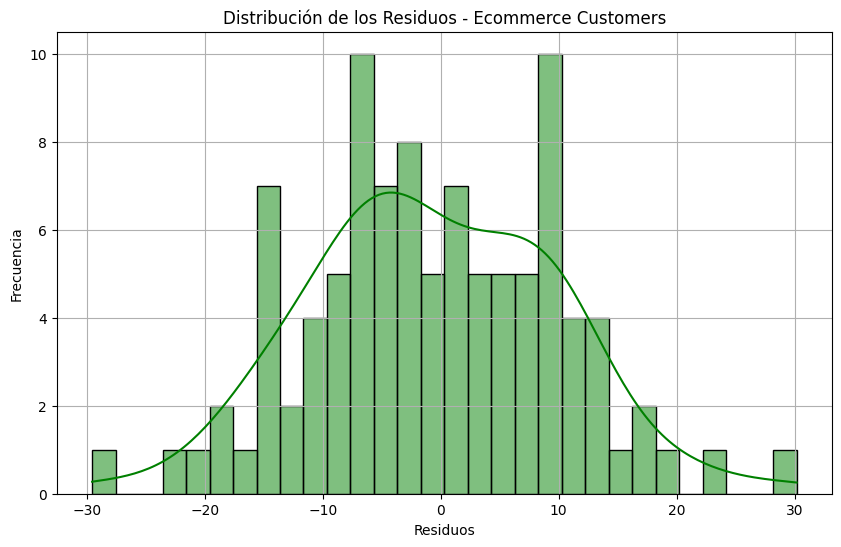

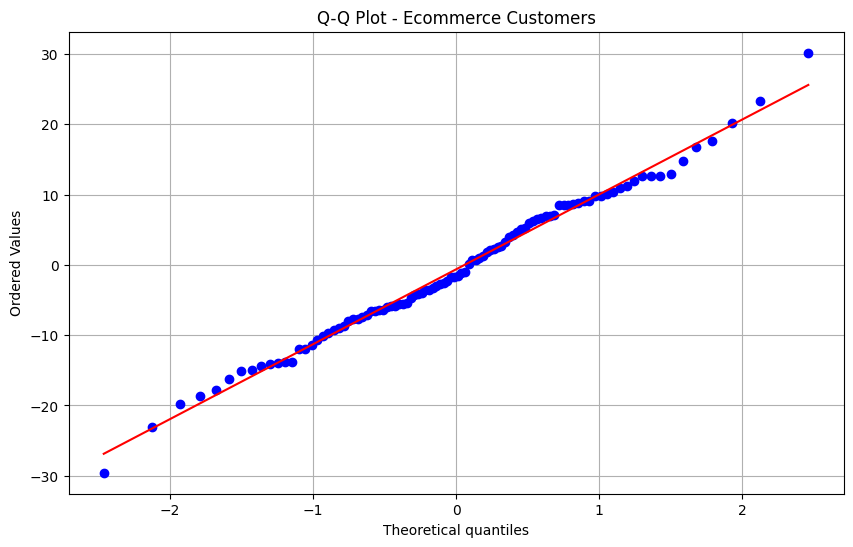

In [31]:
# Cálculo de residuos
residuals_ecommerce = y_test_ecommerce - y_pred_ecommerce

# Gráfico de residuos vs predicciones para Ecommerce Customers
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ecommerce, residuals_ecommerce, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicciones (Yearly Amount Spent)")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones - Ecommerce Customers")
plt.grid(True)
plt.show()

# Histograma de los residuos para Ecommerce Customers
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ecommerce, kde=True, bins=30, color='green')
plt.title("Distribución de los Residuos - Ecommerce Customers")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Q-Q plot para Ecommerce Customers
plt.figure(figsize=(10, 6))
stats.probplot(residuals_ecommerce, dist="norm", plot=plt)
plt.title("Q-Q Plot - Ecommerce Customers")
plt.grid(True)
plt.show()

## **7. Visualizar las predicciones vs valores reales**

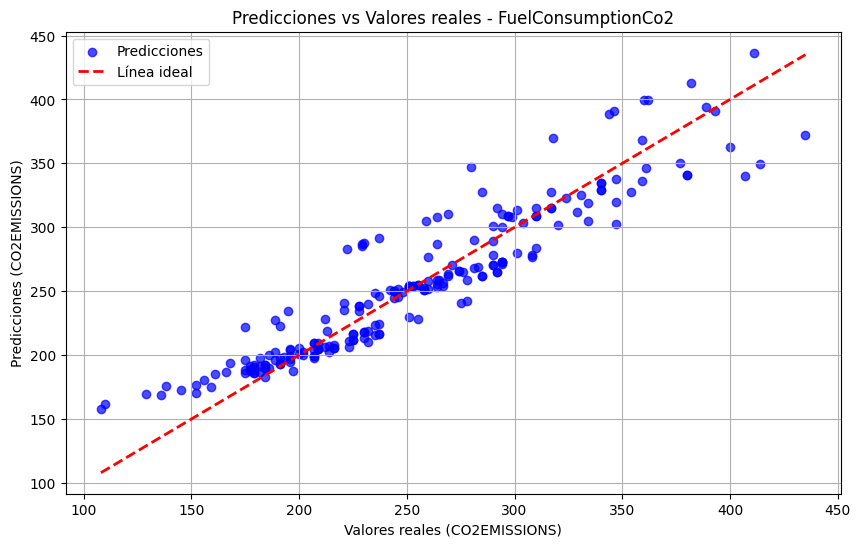

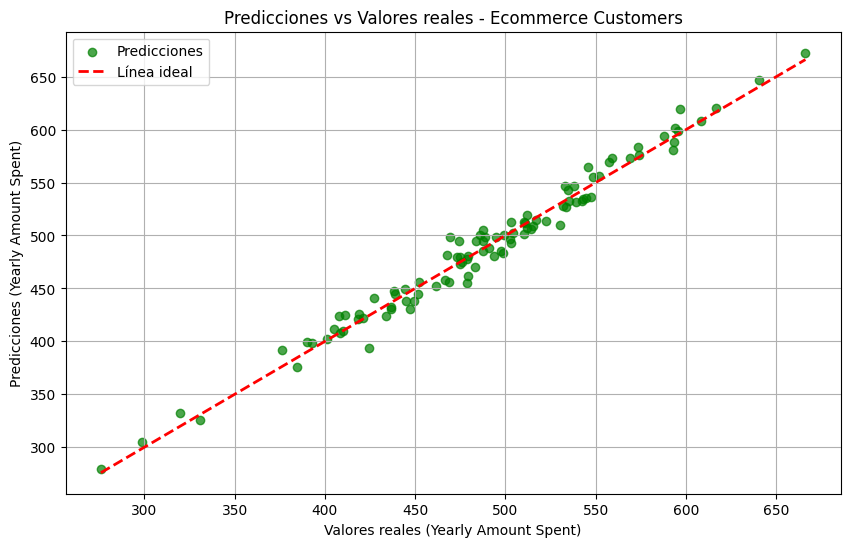

In [32]:
import matplotlib.pyplot as plt

# Scatter plot for FuelConsumptionCo2
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fuel, y_pred_fuel, alpha=0.7, color='blue', label='Predicciones')
plt.plot([y_test_fuel.min(), y_test_fuel.max()], [y_test_fuel.min(), y_test_fuel.max()], 'r--', lw=2, label='Línea ideal')
plt.xlabel("Valores reales (CO2EMISSIONS)")
plt.ylabel("Predicciones (CO2EMISSIONS)")
plt.title("Predicciones vs Valores reales - FuelConsumptionCo2")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Ecommerce Customers
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ecommerce, y_pred_ecommerce, alpha=0.7, color='green', label='Predicciones')
plt.plot([y_test_ecommerce.min(), y_test_ecommerce.max()], [y_test_ecommerce.min(), y_test_ecommerce.max()], 'r--', lw=2, label='Línea ideal')
plt.xlabel("Valores reales (Yearly Amount Spent)")
plt.ylabel("Predicciones (Yearly Amount Spent)")
plt.title("Predicciones vs Valores reales - Ecommerce Customers")
plt.legend()
plt.grid(True)
plt.show()

# **PLUS:**

## **8. Ajuste para el dataset FuelConsumptionCo2 mediante un modelo polinómico de grado 2.**

Modelo Polinómico - Métricas:
Error Cuadrático Medio (MSE): 341.40403844923094
Coeficiente de Determinación (R²): 0.9174344526035536


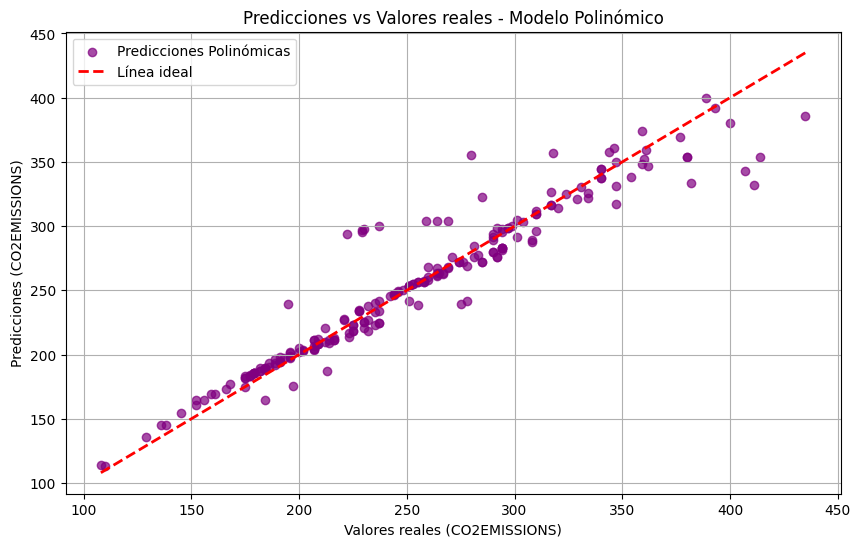

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Crear un modelo polinómico de grado 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Dividir los datos
X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)

# Entrenar el modelo
poly_model.fit(X_train_fuel, y_train_fuel)

# Predicciones
y_pred_fuel_poly = poly_model.predict(X_test_fuel)

# Evaluar el modelo
mse_fuel_poly = mean_squared_error(y_test_fuel, y_pred_fuel_poly)
r2_fuel_poly = r2_score(y_test_fuel, y_pred_fuel_poly)

print("Modelo Polinómico - Métricas:")
print("Error Cuadrático Medio (MSE):", mse_fuel_poly)
print("Coeficiente de Determinación (R²):", r2_fuel_poly)

# Scatter plot para el modelo polinómico
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fuel, y_pred_fuel_poly, alpha=0.7, color='purple', label='Predicciones Polinómicas')
plt.plot([y_test_fuel.min(), y_test_fuel.max()], [y_test_fuel.min(), y_test_fuel.max()], 'r--', lw=2, label='Línea ideal')
plt.xlabel("Valores reales (CO2EMISSIONS)")
plt.ylabel("Predicciones (CO2EMISSIONS)")
plt.title("Predicciones vs Valores reales - Modelo Polinómico")
plt.legend()
plt.grid(True)
plt.show()

## **8. CONCLUSIONES, CONSIDERACIONES Y RECOMENDACIONES GENERALES**

### Conclusiones del Análisis de Regresión Lineal

A continuación les presento un análisis detallado de los resultados obtenidos en los modelos de regresión lineal aplicados a los dos conjuntos de datos estudiados.

#### Dataset FuelConsumptionCo2

##### Relación entre variables y emisiones de CO₂

El análisis de correlación muestra una fuerte relación entre las emisiones de CO₂ y varias características de los vehículos:

- **ENGINESIZE (Tamaño del motor)**: Con una correlación de 0.87, existe una relación positiva muy fuerte entre el tamaño del motor y las emisiones de CO₂. Por cada litro adicional en el tamaño del motor, las emisiones aumentan en promedio 11.21 unidades. Esto confirma la intuición de que motores más grandes generalmente consumen más combustible y, por ende, producen más emisiones.

- **CYLINDERS (Cilindros)**: Con una correlación de 0.85, el número de cilindros también muestra una fuerte relación positiva con las emisiones. Cada cilindro adicional contribuye aproximadamente 7.16 unidades más de emisiones de CO₂. Esto se alinea con el principio de que más cilindros suelen implicar mayor consumo de combustible.

- **FUELCONSUMPTION_COMB (Consumo combinado de combustible)**: Esta variable presenta la correlación más alta (0.89) con las emisiones de CO₂. Por cada unidad adicional de consumo combinado, las emisiones aumentan en 9.52 unidades. Esta relación es lógica ya que el CO₂ es un producto directo de la combustión del combustible.

##### Rendimiento del modelo

El modelo de regresión lineal múltiple logró un coeficiente de determinación (R²) de 0.88, lo que indica que aproximadamente el 88% de la variabilidad en las emisiones de CO₂ puede explicarse por las variables independientes seleccionadas. El error cuadrático medio (RMSE) de 22.65 gramos de CO₂ proporciona una medida de la precisión de las predicciones en las unidades originales.

Al implementar un modelo polinómico de grado 2, se observó una mejora significativa en el rendimiento, con un R² de 0.92 y un MSE reducido a 341.40. Esto sugiere la presencia de relaciones no lineales entre las variables predictoras y las emisiones de CO₂ que el modelo polinómico captura mejor.

##### Análisis de residuos

El análisis de residuos reveló cierta heteroscedasticidad, con mayor dispersión en los valores predichos más altos. Esto sugiere que el modelo es menos preciso para vehículos con emisiones más elevadas. La distribución de residuos, aunque aproximadamente normal, muestra algunas desviaciones, especialmente en los extremos según el Q-Q plot. Estas observaciones indican que podría haber factores adicionales no capturados por el modelo o relaciones no lineales que el modelo lineal no puede representar completamente.

#### Dataset Ecommerce Customers

##### Relación entre variables y gasto anual

El análisis de correlación muestra relaciones significativas entre el gasto anual de los clientes y varias métricas de comportamiento:

- **Length of Membership (Duración de la membresía)**: Con una correlación de 0.81, esta variable muestra la relación más fuerte con el gasto anual. Por cada año adicional de membresía, el gasto anual aumenta en promedio $61.88. Esto destaca la importancia de la retención de clientes y sugiere que los clientes más leales tienden a gastar significativamente más.

- **Time on App (Tiempo en la aplicación)**: Con una correlación moderada de 0.50, cada unidad adicional de tiempo en la aplicación se asocia con un aumento promedio de $38.81 en el gasto anual. Esto subraya la importancia de una experiencia de usuario atractiva en la aplicación móvil.

- **Avg. Session Length (Duración promedio de sesión)**: Con una correlación de 0.36, cada unidad adicional en la duración promedio de sesión se asocia con un aumento de $25.60 en el gasto anual. Aunque es la correlación más baja de las tres variables, sigue siendo significativa y sugiere que los clientes que pasan más tiempo por sesión tienden a realizar compras mayores.

##### Rendimiento del modelo

El modelo de regresión lineal múltiple para el dataset de Ecommerce logró un coeficiente de determinación (R²) excepcionalmente alto de 0.98, indicando que el 98% de la variabilidad en el gasto anual puede explicarse por las tres variables independientes seleccionadas. El RMSE de $10.50 muestra una precisión notable en las predicciones.

##### Análisis de residuos

El análisis de residuos para este modelo mostró una distribución más uniforme alrededor de cero y una mejor aproximación a la normalidad en comparación con el modelo de emisiones de CO₂. El Q-Q plot también reveló un mejor ajuste a la normalidad. Estas características indican que el modelo cumple mejor con los supuestos de la regresión lineal y proporciona predicciones más confiables en todo el rango de valores.

#### Comparación entre modelos

Al comparar ambos modelos, se observa que:

1. El modelo de Ecommerce Customers presenta un mejor ajuste (R² = 0.98) que el modelo lineal de FuelConsumptionCo2 (R² = 0.88), aunque el modelo polinómico de este último se acerca (R² = 0.92).

2. El modelo de Ecommerce muestra residuos mejor comportados, lo que sugiere que las relaciones entre las variables son más lineales y que el modelo captura mejor la variabilidad de los datos.

3. En ambos casos, las variables con mayor correlación (FUELCONSUMPTION_COMB y Length of Membership, respectivamente) resultaron ser los predictores más importantes en los modelos, confirmando la importancia de un buen análisis exploratorio previo a la modelación.

#### Implicaciones prácticas

##### Para FuelConsumptionCo2:

- Los resultados confirman que el tamaño del motor, el número de cilindros y el consumo de combustible son factores determinantes en las emisiones de CO₂ de los vehículos.
- El modelo polinómico proporciona mejores predicciones, lo que sugiere que las relaciones entre estas variables y las emisiones no son estrictamente lineales.
- Estos hallazgos pueden ser útiles para fabricantes de automóviles que buscan diseñar vehículos más eficientes y para reguladores que establecen estándares de emisiones.

##### Para Ecommerce Customers:

- La duración de la membresía es el factor más influyente en el gasto anual, lo que resalta la importancia de las estrategias de retención de clientes.
- El tiempo que los usuarios pasan en la aplicación también tiene un impacto significativo, lo que sugiere que mejorar la experiencia de usuario y la funcionalidad de la aplicación podría aumentar las ventas.
- La duración promedio de sesión, aunque menos influyente, sigue siendo un predictor significativo del gasto, lo que indica que fomentar sesiones más largas podría ser beneficioso.

#### Recomendaciones finales

1. **Para el análisis de emisiones de CO₂**:
   - Utilizar el modelo polinómico para predicciones futuras debido a su mejor rendimiento.
   - Considerar la inclusión de variables adicionales como el peso del vehículo, la aerodinámica o la tecnología del motor para mejorar aún más el modelo.
   - Explorar técnicas de modelado más avanzadas para capturar mejor las relaciones no lineales y reducir la heteroscedasticidad observada.

2. **Para el análisis de comportamiento de clientes de Ecommerce**:
   - Implementar estrategias para aumentar la duración de membresía de los clientes, como programas de lealtad o beneficios exclusivos para miembros de larga duración.
   - Invertir en mejorar la experiencia de usuario de la aplicación para aumentar el tiempo que los usuarios pasan en ella.
   - Diseñar la interfaz y el contenido para fomentar sesiones más largas, por ejemplo, mediante recomendaciones personalizadas o contenido relacionado.
   - Utilizar el modelo actual para identificar clientes con alto potencial de gasto y dirigir esfuerzos de marketing específicamente a ellos.

Este análisis demuestra el poder de la regresión lineal para identificar relaciones significativas entre variables y hacer predicciones precisas en diversos contextos. La comparación entre ambos modelos también ilustra la importancia de evaluar diferentes enfoques de modelado y de considerar transformaciones no lineales cuando sea apropiado.